## 2021 Spring "EE479: Scientific Computing & Data"
#### Ryong Gyu Lee (KAIST EE Yong-Hoon Kim Group)
#### Kutz 13.1 Basics of Fourier Series and the Fourier Transform
#### 2021. 05. 11 Revised from matlab version

### Fourier series

**Real form**

Fourier introduced the concept of representing a given function by a trigonometric series of sines and cosines:

$$f(x)=\frac{a_{0}}{2}+\sum^{\infty}_{n=1}(a_{n}\cos nx+b_{n}\sin nx) \quad x\in (-\pi,\pi ] $$

where the expansion coefficients $a_{n}$ and $b_{n}$ would be,


$$\begin{align}
a_{n}&=\frac{1}{\pi}\int_{-\pi}^{\pi}f(x) \cos nxdx \quad n \geq 0 \\
b_{n}&=\frac{1}{\pi}\int_{-\pi}^{\pi}f(x) \cos nxdx \quad n > 0
\end{align}
$$

**Complex form**

Similarly, the complex version of the expansion produces the Fourier series on the domain x $\in$ [−L, L] which is given by:
$$f(x)=\sum_{\infty}^{\infty} c_{n}e^{in\pi x/L}$$

with the corresponding Fourier coefficients,

$$c_{n}=\frac{1}{2L}\int_{-L}^{L}f(x)e^{-in\pi x/L}$$

### Fourier transform

The Fourier transform is an integral transform defined over the entire line x $\in$ [−$\infty$,$\infty$]. The Fourier transform and its inverse are defined as:

$$\begin{align}
F(k)&=\frac{1}{\sqrt{2\pi}}\int_{-\infty}^{\infty}e^{-ikx}f(x)dx \\
f(x)&=\frac{1}{\sqrt{2\pi}}\int_{-\infty}^{\infty}e^{ikx}F(k)dk
\end{align}
$$

### The fast Fourier transform (FFT)

The fast Fourier transform routine was developed specifically to perform the forward and backward Fourier transforms. The key features
of the FFT routine are as follows:

1. It has a low operation count: $O(N\log N)$
2. It finds the transform on an interval x $\in$ [−L, L]. Since the integration kernel $e^{ikx}$ is oscillatory, it implies that the solutions on this finite interval have **periodic boundary conditions**
3. The key to lowering the operation count to $O(N\log N)$ is in discretizing the range x ∈ [−L, L] into 2n points (i.e. 2, 4, 8, 16, 32, 64, 128, ...)
4. The FFT has excellent accuracy properties, typically well beyond that of standard discretization schemes

To see the practical implications of the FFT, we consider the transform of a Gaussian function.The transform can be calculated analytically so that we have the exact relations:

$$f(x)=exp(-\alpha x^{2}) \quad \rightarrow \quad \widehat{f(x)}=\frac{1}{\sqrt{2\alpha}}exp(-\frac{k^{2}}{4\alpha}) $$

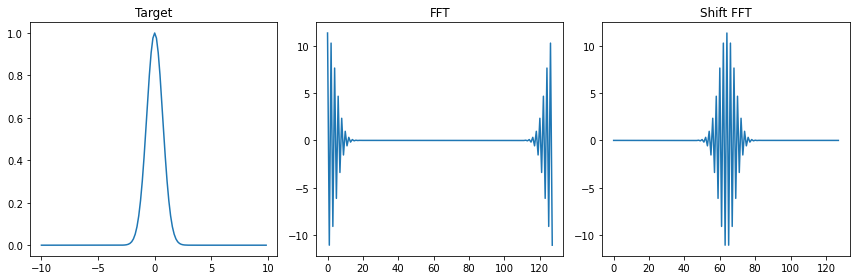

In [1]:
import numpy as np
import matplotlib.pyplot as plt

L = 20    # define the computational domain [-L/2,L/2]
n = 128   # define the number of Fourier modes 2^n
alpha = 1 # define parameter for target Gaussian function


x2 = np.linspace(-L/2,L/2,n+1); # define the domain discretization
x  = x2[:n]                     # consider only the first n points: periodicity

u  = np.exp(-alpha*x**2)           # function to take a derivative of
ut = np.fft.fft(u)           # FFT the function
utshift=np.fft.fftshift(ut)  # shift FFT

# k rescaled to 2pi domain
k = np.concatenate((np.arange(0,n/2),np.arange(-n/2,0)))
k = (2*np.pi/L) * k
k = (2*np.pi) * np.fft.fftfreq(n,d=L/n)
#print(k)

# visualization
fig = plt.figure(figsize = [12,4])

# set subplot
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

# set title
ax1.set_title('Target')
ax2.set_title('FFT')
ax3.set_title('Shift FFT')

# plot
ax1.plot(x,u)
ax2.plot(np.real(ut))
ax3.plot(np.real(utshift))

plt.tight_layout()
plt.show()

### Derivative relations (spectral derivative)

The critical property in the usage of Fourier transforms concerns derivative relations. To see how these properties are generated, we begin by considering the Fourier transform of $f'(x)$. We denote the Fourier transform of $f(x)$ as $\widehat{f'(x)}$. Then we find:

$$\begin{align}
\widehat{f'(x)}&=\frac{1}{\sqrt{2\pi}}\int^{\infty}_{\infty}e^{-ikx}f'(x)dx \\
               &=f(x)e^{-ikx}|_{\infty}^{\infty} + \frac{ik}{\sqrt{2\pi}}\int^{\infty}_{\infty}e^{-ikx}f(x)dx \\
               &=0 + ik\widehat{f(x)}
\end{align}
$$

Here, we assumed $f(x)$ $\rightarrow$ 0 as x $\rightarrow$ $\pm \infty$. Using the above formula, we can derive following relation between Fourier transforms of the derivative and the Fourier transform itself:

$$ \widehat{f^{(n)}} = (ik)^{n}\widehat{f} $$


### FFT versus finite difference differentiation

A comparison can be made between the differentiation accuracy of finite difference formulas and the spectral method using FFTs. As an example of how to implement this differentiation formula, consider a specific function:

$$ u(x) = sech(x) $$

which has the following derivative relations

$$\begin{align}
\frac{du}{dx}&=-sech(x)tanh(x) \\
\frac{d^{2}u}{dx^{2}}&=sech(x)-2sech^{3}(x)
\end{align} 
$$



> **Review**  
> 1) Second-order accurate center-difference formulas  
> 2) Fourth-order accurate center-difference formulas

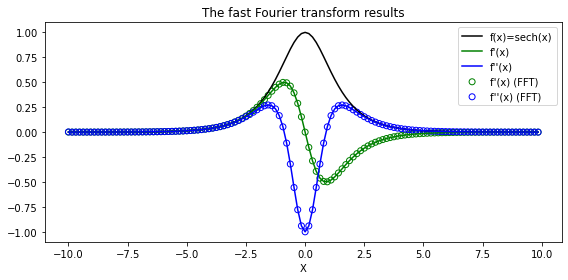

In [2]:
import numpy as np
import matplotlib.pyplot as plt

L = 20    # define the computational domain [-L/2,L/2]
n = 128   # define the number of Fourier modes 2^n

x2 = np.linspace(-L/2,L/2,n+1)  # define the domain discretization
x  = x2[:n]                     # consider only the first n points: periodicity
dx = x[1] - x[0]                # dx value needed for finite difference

sechx  = 1 / np.cosh(x)  # define sech(x)
u   = sechx               # function to take a derivative of
ut  = np.fft.fft(u)      # FFT the function
ux  = np.zeros(n)        # first derivative function of finite difference
ux2 = np.zeros(n)        # first derivative function of finite difference

# Analytic solution
u1exact = -sechx*np.tanh(x)
u2exact = sechx - 2*sechx**3

# FFT method

# k rescaled to 2pi domain
#k = np.concatenate((np.arange(0,n/2),np.arange(-n/2,0)))
#k = (2*np.pi/L) * k
k = (2*np.pi) * np.fft.fftfreq(n,d=L/n)

# FFT calculation of derivatives
ut1 = (1j*k) * ut     # first derivative
ut2 = (1j*k)**2 * ut  # second derivative

# inverse transform
u1 = np.real(np.fft.ifft(ut1))
u2 = np.real(np.fft.ifft(ut2))

# visualization
fig = plt.figure(figsize=[8,4])
plt.title('The fast Fourier transform results')
plt.plot(x, u, 'k', label = 'f(x)=sech(x)')
plt.plot(x, u1exact, 'g', label = "f'(x)")
plt.scatter(x, u1, facecolors='none', edgecolors='g', label = "f'(x) (FFT)")
plt.plot(x, u2exact, 'b', label = "f''(x)")
plt.scatter(x, u2, facecolors='none', edgecolors='b', label = "f''(x) (FFT)")
plt.xlabel('X')

plt.legend()
plt.tight_layout()
plt.show()

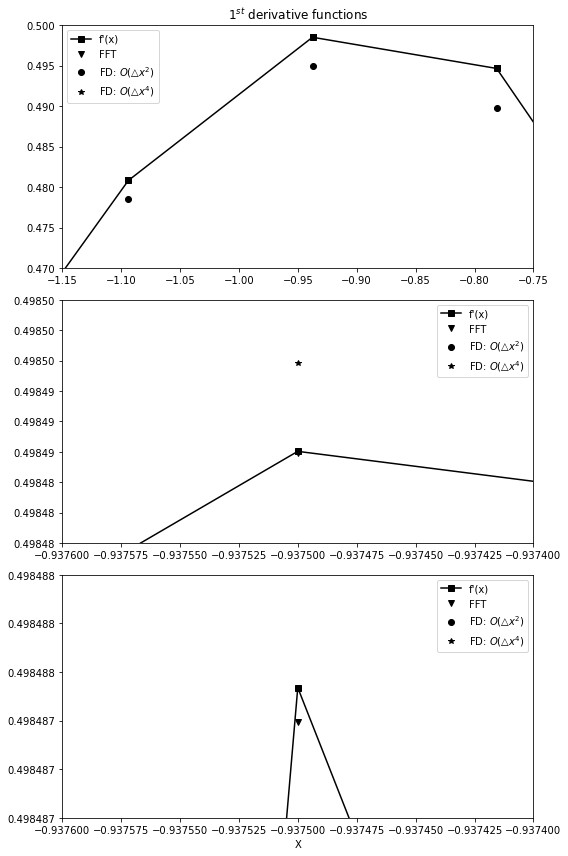

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from derivative import *
from matplotlib.ticker import FormatStrFormatter

# define parameter
L = 20    # computational domain [-L/2,L/2]
n = 128   # the number of Fourier modes 2^n

# define the target function
f = np.vectorize(lambda x: 1 / np.cosh(x))
df_exact = np.vectorize(lambda x: -1 / np.cosh(x) * np.tanh(x))

# define the domain discretization
x2 = np.linspace(-L/2,L/2,n+1)  
x  = x2[:n]

# calculate derivative function
u1exact = df_exact(x) # exact 
u1 = spectral_derivative(f, x) # sepectral method
ux = second_order_finite_difference(f, x) # second-order FD
ux2 = fourth_order_finite_difference(f, x) # fourth-order FD

# visualization
fig = plt.figure(figsize=[8,12])

ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)

# set plot range
ax1.set_xlim([-1.15,-0.75])
ax2.set_xlim([-0.9376,-0.9374])
ax3.set_xlim([-0.9376,-0.9374])

ax1.set_ylim([0.47,0.5])
ax2.set_ylim([0.49848,0.49850])
ax3.set_ylim([0.498487,0.498488])

# first plot region
ax1.set_title(r'$1^{st}$ derivative functions')
ax1.plot(x, u1exact, 'ks-', label="f'(x)")
ax1.plot(x, u1, 'kv', label='FFT')
ax1.plot(x, ux, 'ko',label=r'FD: $O(\bigtriangleup x^{2})$')
ax1.plot(x, ux2, 'k*', label=r'FD: $O(\bigtriangleup x^{4})$')
ax1.legend()

# second plot region
ax2.plot(x, u1exact, 'ks-', label="f'(x)")
ax2.plot(x, u1, 'kv', label='FFT')
ax2.plot(x, ux, 'ko',label=r'FD: $O(\bigtriangleup x^{2})$')
ax2.plot(x, ux2, 'k*', label=r'FD: $O(\bigtriangleup x^{4})$')
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.5f'))
ax2.legend()

# second plot region
ax3.plot(x, u1exact, 'ks-', label="f'(x)")
ax3.plot(x, u1, 'kv', label='FFT')
ax3.plot(x, ux, 'ko',label=r'FD: $O(\bigtriangleup x^{2})$')
ax3.plot(x, ux2, 'k*', label=r'FD: $O(\bigtriangleup x^{4})$')
ax3.yaxis.set_major_formatter(FormatStrFormatter('%.6f'))
ax3.set_xlabel('X')
ax3.legend()

plt.tight_layout()
plt.show()

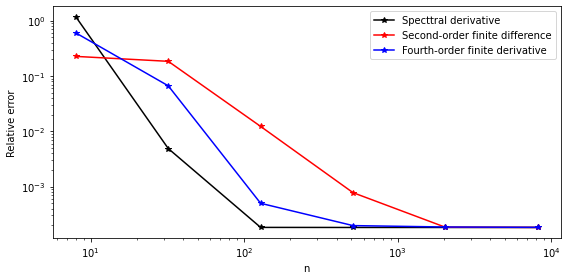

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from derivative import *
from matplotlib.ticker import FormatStrFormatter

# define parameter
L = 20    # computational domain [-L/2,L/2]

# define the target function
f = np.vectorize(lambda x: 1 / np.cosh(x))
df_exact = np.vectorize(lambda x: -1 / np.cosh(x) * np.tanh(x))

N = []
error_fft = []
error_fd2 = []
error_fd4 = []

# loop over n = 8, 32, 128, 512, 2048, 8192, 32768, 131072
for i in range(2,8):    
    
    # define the number of grid points
    n = 2**(2*i-1)        
    
    # define the domain discretization
    x2 = np.linspace(-L/2,L/2,n+1, dtype= np.float64)  
    x  = x2[:n]

    # derivative the target function
    df_fft = spectral_derivative(f, x)
    df_fd2 = second_order_finite_difference(f, x)
    df_fd4 = fourth_order_finite_difference(f, x)
    df = df_exact(x)
    
    # calculate error
    N.append(n)
    error_fft.append(max(np.abs(df_fft-df))/max(np.abs(df)))
    error_fd2.append(max(np.abs(df_fd2-df))/max(np.abs(df)))
    error_fd4.append(max(np.abs(df_fd4-df))/max(np.abs(df)))   
    
# visualization
fig = plt.figure(figsize=[8,4])

plt.plot(N[:6], error_fft[:6], 'k*-', label = 'Specttral derivative')
plt.plot(N[:6], error_fd2[:6], 'r*-', label = 'Second-order finite difference')
plt.plot(N[:6], error_fd4[:6], 'b*-', label = 'Fourth-order finite derivative')

plt.ylabel('Relative error')
plt.xlabel('n')
plt.xscale('log')
plt.yscale('log')

plt.legend()
plt.tight_layout()
plt.show()

### Gibb’s phenomenon

For a function which does not satisfy **periodic boundary conditions**, the FFT routine leads to significant error. Much of this error arises from the discontinuous jump and the associated **Gibb's phenomenon** which results when approximating with a Fourier series. As an example of how Gibb's phenomenon occurs in  FFT routine, consider a specific function:

$$ f(x) = \tanh(x) $$

which has the following derivative relations

$$ f'(x) = sech^{2}(x) $$

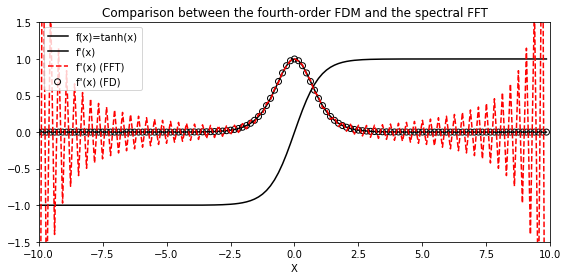

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from derivative import *

L = 20    # define the computational domain [-L/2,L/2]
n = 128   # define the number of Fourier modes 2^n

# define the target function
f = np.vectorize(lambda x: np.tanh(x))
df_exact = np.vectorize(lambda x: 1 / np.cosh(x)**2)

# define the domain discretization
x2 = np.linspace(-L/2,L/2,n+1)  
x  = x2[:n]

# calculate derivative function
u = f(x)
u1exact = df_exact(x) # exact 
u1 = spectral_derivative(f, x) # sepectral method
ux = fourth_order_finite_difference(f, x) # fourth-order FD

# visualization
fig = plt.figure(figsize=[8,4])
plt.title('Comparison between the fourth-order FDM and the spectral FFT')
plt.plot(x, u, 'k', label = 'f(x)=tanh(x)')
plt.plot(x, u1exact, 'k', label = "f'(x)")
plt.scatter(x, ux, facecolors='none', edgecolors='k', label = "f'(x) (FD)")
plt.plot(x, u1, 'r--', label = "f'(x) (FFT)")

plt.xlabel('X')
plt.xlim([-10,10])
plt.ylim([-1.5,1.5])

plt.legend()
plt.tight_layout()
plt.show()

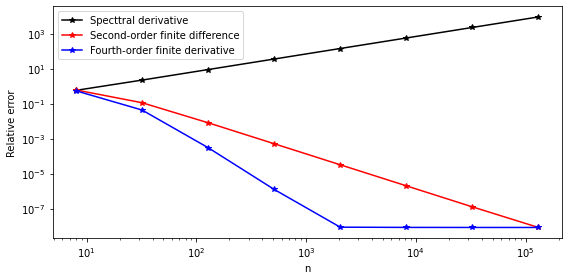

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from derivative import *
from matplotlib.ticker import FormatStrFormatter

# define parameter
L = 20    # computational domain [-L/2,L/2]

# define the target function
f = np.vectorize(lambda x: np.tanh(x))
df_exact = np.vectorize(lambda x: 1 / np.cosh(x)**2)

N = []
error_fft = []
error_fd2 = []
error_fd4 = []

# loop over varying number of grid points
for i in range(2,10):
    
    # define the number of grid points
    n = 2**(2*i-1)
    
    # define the domain discretization
    x2 = np.linspace(-L/2,L/2,n+1)  
    x  = x2[:n]

    # derivative the target function
    df_fft = spectral_derivative(f, x)
    df_fd2 = second_order_finite_difference(f, x)
    df_fd4 = fourth_order_finite_difference(f, x)
    df = df_exact(x)
    
    # calculate error
    N.append(n)
    error_fft.append(max(np.abs(df_fft-df))/max(np.abs(df)))
    error_fd2.append(max(np.abs(df_fd2-df))/max(np.abs(df)))
    error_fd4.append(max(np.abs(df_fd4-df))/max(np.abs(df)))  
    
# visualization
fig = plt.figure(figsize=[8,4])

plt.plot(N, error_fft, 'k*-', label = 'Specttral derivative')
plt.plot(N, error_fd2, 'r*-', label = 'Second-order finite difference')
plt.plot(N, error_fd4, 'b*-', label = 'Fourth-order finite derivative')

plt.ylabel('Relative error')
plt.xlabel('n')
plt.xscale('log')
plt.yscale('log')

plt.legend()
plt.tight_layout()
plt.show()